## **Agent-Based Modelling** : Green Policy Adoption

This project simulates how facilities (agents) decide whether to adopt an energy-efficient upgrade over time. The model considers multiple factors that influence adoption over three scenarios.

The simulation runs over 12 time steps (months), tracking how many agents adopt the policy in each month. The goal is to understand how different behavioral and policy mechanisms affect overall adoption rates — and to explore how strategies like subsidies and awareness campaigns can accelerate sustainable technology uptake.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Base Parameters
num_agents = 100 #simulation done for 100 corporate facilities
num_steps = 12 #simulation done for 12 months
upgrade_cost = 1000 #cost associated with upgrade to an energy-efficient infrastructure
energy_reduction_factor = 0.7 #percentage of energy to be used 
expected_savings_threshold = 100 #minimum energy savings to be achieved to get ROI from this project

#### `Scenario 1` : Only Cost & Budget as deciding factors

In [6]:
#Initializing agent states
np.random.seed(42)
energy_use = np.random.uniform(100, 500, num_agents)
budget = np.random.uniform(1000, 5000, num_agents)
awareness = np.random.uniform(0.2, 1.0, num_agents)
adopted = np.zeros(num_agents, dtype=bool)

Month 1: 24/100 adopted
Month 2: 24/100 adopted
Month 3: 24/100 adopted
Month 4: 24/100 adopted
Month 5: 24/100 adopted
Month 6: 24/100 adopted
Month 7: 24/100 adopted
Month 8: 24/100 adopted
Month 9: 24/100 adopted
Month 10: 24/100 adopted
Month 11: 24/100 adopted
Month 12: 24/100 adopted


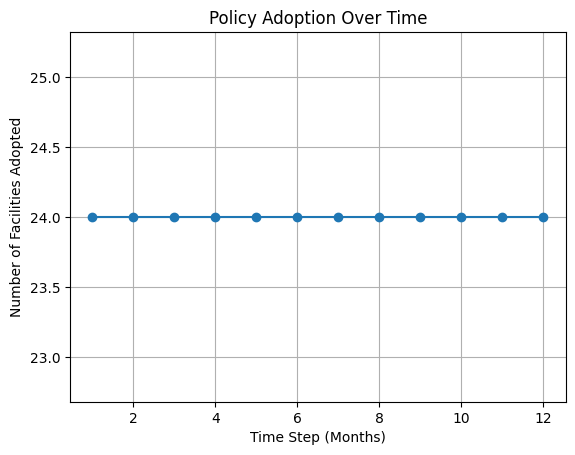

In [7]:
adoption_record = []

#Simulation loop
for step in range(num_steps):
    for i in range(num_agents):
        if not adopted[i]:
            expected_savings = energy_use[i] * (1 - energy_reduction_factor)
            if (
                budget[i] >= upgrade_cost and
                expected_savings > expected_savings_threshold and
                awareness[i] > 0.5
            ):
                adopted[i] = True
                budget[i] -= upgrade_cost
                energy_use[i] *= energy_reduction_factor

    total_adopted = np.sum(adopted)
    adoption_record.append(total_adopted)
    print(f"Month {step + 1}: {total_adopted}/{num_agents} adopted")



plt.plot(range(1, num_steps + 1), adoption_record, marker='o')
plt.xlabel("Time Step (Months)")
plt.ylabel("Number of Facilities Adopted")
plt.title("Policy Adoption Over Time")
plt.grid(True)
plt.show()


#### `Scenario 2` : Additional factors like Subsidy & Awareness

In [8]:
#Adding additional parameters
peer_influence_factor = 0.2  #how much awareness increases with peer adoption
awareness_growth_rate = 0.02  #constant monthly awareness bump

In [9]:
#Initializing agent states
np.random.seed(42)
energy_use = np.random.uniform(100, 500, num_agents)
budget = np.random.uniform(1000, 5000, num_agents)
awareness = np.random.uniform(0.2, 1.0, num_agents)
adopted = np.zeros(num_agents, dtype=bool)

Month 1: 25/100 adopted
Month 2: 30/100 adopted
Month 3: 33/100 adopted
Month 4: 38/100 adopted
Month 5: 40/100 adopted
Month 6: 40/100 adopted
Month 7: 40/100 adopted
Month 8: 40/100 adopted
Month 9: 40/100 adopted
Month 10: 40/100 adopted
Month 11: 40/100 adopted
Month 12: 40/100 adopted


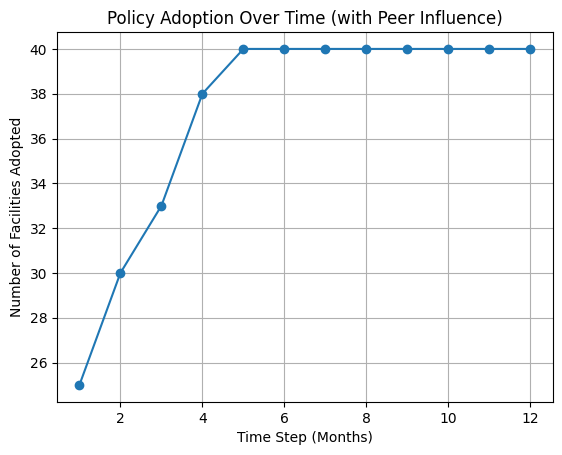

In [ ]:
adoption_record = []

#simulation loop
for step in range(num_steps):
    
    #applying subsidy after 5th month (no specific reason, mid-year is a reasonable choice)
    if step >= 5:
        effective_upgrade_cost = upgrade_cost * 0.7  #30% subsidy
    else:
        effective_upgrade_cost = upgrade_cost

    total_adopted_prev = np.sum(adopted)
    adoption_rate = total_adopted_prev / num_agents

    for i in range(num_agents):
        if not adopted[i]:
            #introducing impact of Peer influence on awareness
            awareness[i] += peer_influence_factor * adoption_rate
            awareness[i] = min(1.0, awareness[i])  

            #gradual awareness growth
            awareness[i] += awareness_growth_rate
            awareness[i] = min(1.0, awareness[i])

            expected_savings = energy_use[i] * (1 - energy_reduction_factor)
        if (
            budget[i] >= effective_upgrade_cost and
            expected_savings > expected_savings_threshold and
            awareness[i] > 0.5
        ):
            adopted[i] = True
            budget[i] -= effective_upgrade_cost
            energy_use[i] *= energy_reduction_factor

    total_adopted = np.sum(adopted)
    adoption_record.append(total_adopted)
    print(f"Month {step + 1}: {total_adopted}/{num_agents} adopted")


plt.plot(range(1, num_steps + 1), adoption_record, marker='o')
plt.xlabel("Time Step (Months)")
plt.ylabel("Number of Facilities Adopted")
plt.title("Policy Adoption Over Time (with Peer Influence)")
plt.grid(True)
plt.show()


#### `Scenario 3` : introducing Dynamic & Behavioural factors for Realistic Simulation

In [11]:
#Initializing agent states
np.random.seed(42)
energy_use = np.random.uniform(100, 500, num_agents)
budget = np.random.uniform(1000, 5000, num_agents)
awareness = np.random.uniform(0.2, 1.0, num_agents)
adopted = np.zeros(num_agents, dtype=bool)

Month 1: 25/100 adopted
Month 2: 41/100 adopted
Month 3: 47/100 adopted
Month 4: 50/100 adopted
Month 5: 54/100 adopted
Month 6: 55/100 adopted
Month 7: 59/100 adopted
Month 8: 67/100 adopted
Month 9: 71/100 adopted
Month 10: 72/100 adopted
Month 11: 79/100 adopted
Month 12: 79/100 adopted


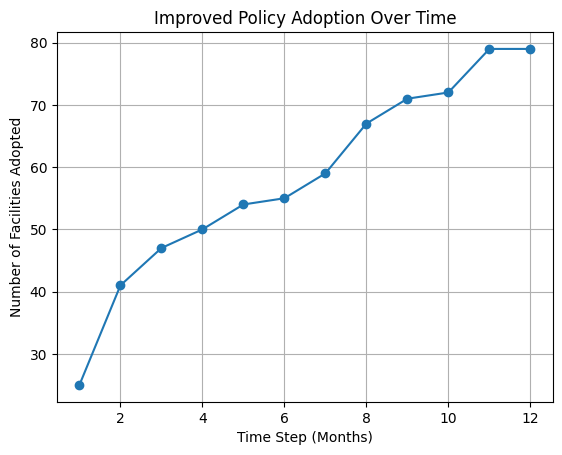

In [12]:
adoption_record = []

#simulation loop
for step in range(num_steps):
    #dynamic subsidy based on time
    if step >= 8:
        effective_upgrade_cost = upgrade_cost * 0.5  #50% subsidy
    elif step >= 5:
        effective_upgrade_cost = upgrade_cost * 0.7  #30% subsidy
    else:
        effective_upgrade_cost = upgrade_cost

    adoption_rate = np.sum(adopted) / num_agents

    for i in range(num_agents):
        if adopted[i]:
            continue  

        #enhanced peer influence for unaware agents
        if awareness[i] < 0.6:
            awareness[i] += peer_influence_factor * adoption_rate * 1.5
        else:
            awareness[i] += peer_influence_factor * adoption_rate

        #boost for low-awareness agents (assuming that a trageted campaign will be run to enhance conversions)
        if awareness[i] < 0.4:
            awareness[i] += 0.03  

        #gradual awareness growth
        awareness[i] += awareness_growth_rate
        awareness[i] = min(1.0, awareness[i])

        #dynamic expected savings threshold
        dynamic_threshold = expected_savings_threshold - (step * 5)
        dynamic_threshold = max(50, dynamic_threshold)  # floor limit

        expected_savings = energy_use[i] * (1 - energy_reduction_factor)

        #introducing behavioural factor of Social Pressure
        social_pressure = 0.3 * adoption_rate

        if (
            budget[i] >= effective_upgrade_cost and
            expected_savings > dynamic_threshold and
            awareness[i] + social_pressure > 0.5
        ):
            adopted[i] = True
            budget[i] -= effective_upgrade_cost
            energy_use[i] *= energy_reduction_factor

    total_adopted = np.sum(adopted)
    adoption_record.append(total_adopted)
    print(f"Month {step + 1}: {total_adopted}/{num_agents} adopted")




plt.plot(range(1, num_steps + 1), adoption_record, marker='o')
plt.xlabel("Time Step (Months)")
plt.ylabel("Number of Facilities Adopted")
plt.title("Improved Policy Adoption Over Time")
plt.grid(True)
plt.show()
